# Single predictor models
Single predictor models investigating the effect of a range of lower- and higher-level visual and auditory predictors.

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from tools.create import create_single_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from tools.viz import (plot_regressor, plot_contrast,
                       plot_metrics, plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid, plot_individual_analyses)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

In [17]:
api = Neuroscout()

## Define predictors and confounds

In [4]:
predictors = ['speech', 'rms', 'text',
              'brightness', 'shot_change', 
              'any_faces', 
              'hand', 'action', 'landscape', 'building', 'indoors', 'city', 
              'animal', 'music', 'vehicle', 'water', 'wood', 'tool', 
              'people']

In [5]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

## Create models

In [7]:
#single_models = create_single_models(predictors, confounds)

In [8]:
filename = Path('models') / 'single_predictor.json'

In [9]:
# Note: shot change is not available for NNDb due to issues w/ Google API
single_models = load_collection(filename)

In [10]:
# Single predictor models with all runs/tasks in the same model
nnd_single_combined_path = Path('models') / 'single_predictor_nnd_comined.json'
# dump_collection(single_models_nnd_combined, nnd_single_combined_path)
single_models_nnd_combined = load_collection(nnd_single_combined_path)

## Generate reports

In [14]:
for (pred, dataset, task), model in flatten_collection(nnd_single_models):
    model.generate_report(run_id=model.runs[0])

## Inspect regressors

In [ ]:
df = _extract_regressors(single_models)

In [ ]:
plot_regressor_distribution(df=df, split_by='hue', color=None, aspect=3, hist=None, rug=True)

In [ ]:
plot_regressor_timeseries(df=df, split_by='row', height=1.2, aspect=10)

In [ ]:
agg_df = compute_metrics(df=df, aggfunc=[np.mean, np.std, np.var])

In [ ]:
plot_metrics(agg_df, metrics=['mean', 'std', 'var'],
             sns_function='barplot', height=3, aspect=1)

## Compile models

In [17]:
for (pred, dataset, task), model in flatten_collection(single_models_narratives):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'{pred} {model.status} for {dataset}')

# Single predictor models
Single predictor models investigating the effect of a range of lower- and higher-level visual and auditory predictors.

In [28]:
api.datasets.get()

[{'active': True,
  'description': {'Acknowledgements': 'Only open-source software was employed in this study. We thank their respective authors for making it publicly available.',
   'Authors': ['Michael Hanke',
    'Falko R. Kaule',
    'Ayan Sengupta',
    'Florian J. Baumgartner',
    'J. Swaroop Guntupalli',
    'Christian Häusler',
    'Michael Hoffmann',
    'Vittorio Iacovella',
    'Daniel Kottke',
    'Jörg Stadler'],
   'BIDSVersion': '1.0.0-rc3',
   'Description': 'Extension of the dataset published in Hanke et al. (2014; doi:10.1038/sdata.2014.3) with additional acquisitions for 15 of the original 20 particpants. These additions include: retinotopic mapping, a localizer paradigm for higher visual areas (FFA, EBA, PPA), and another 2h movie recording with 3T full-brain BOLD fMRI with simultaneous 1000 Hz eyetracking.',
   'Funding': 'We acknowledge the support of the Combinatorial NeuroImaging Core Facility at the Leibniz Institute for Neurobiology in Magdeburg, and the Ger

# Results

/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/alejandro/anaconda3/lib/python3.7/site-package

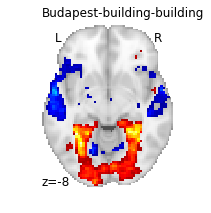

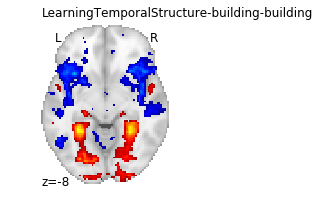

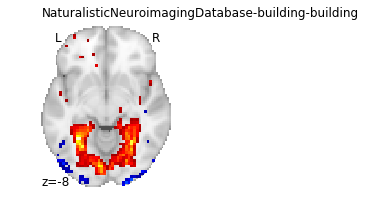

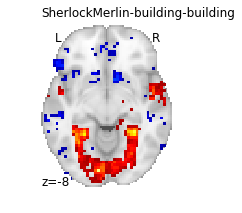

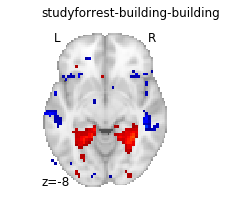

In [43]:
flat_models = flatten_collection(single_models)
for (contrast, dataset, task), an in flat_models:
    if contrast=='building' and task in ['SherlockMovie', 'movie', 'citizenfour'] and dataset != ['studyforrest']:
        plot_contrast(contrast, an, space='MNI152NLin2009cAsym', plot_kwargs=dict(colorbar=False, cut_coords=[-8], vmax=15), threshold=3.29)

/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/alejandro/anaconda3/lib/python3.7/site-package

/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


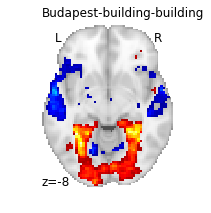

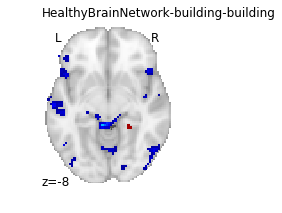

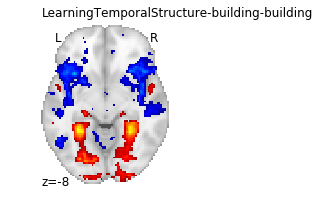

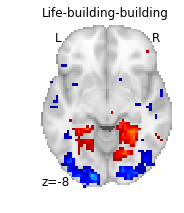

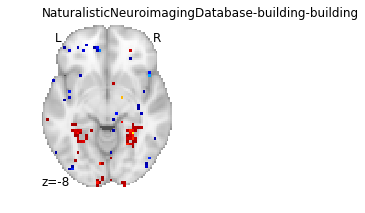

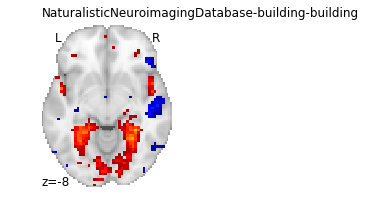

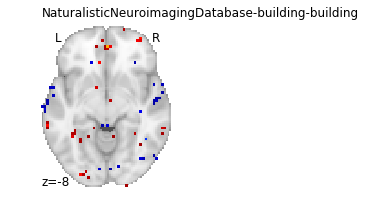

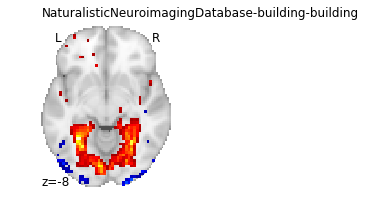

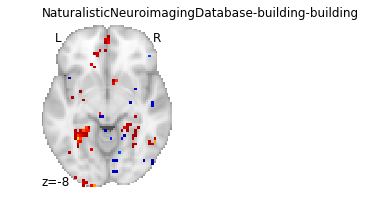

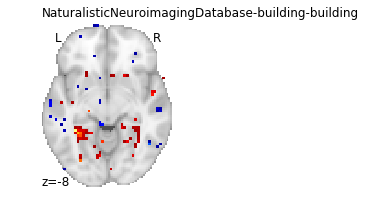

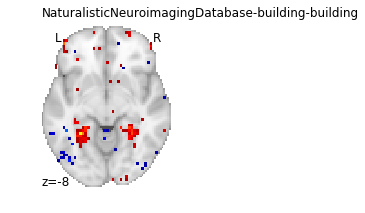

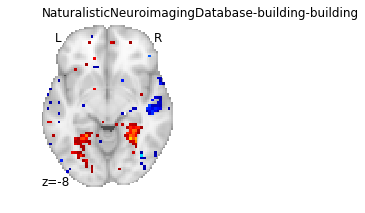

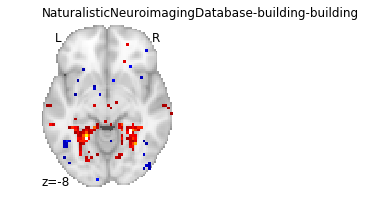

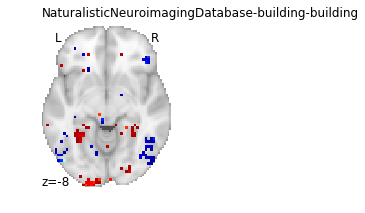

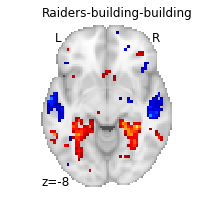

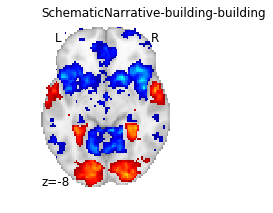

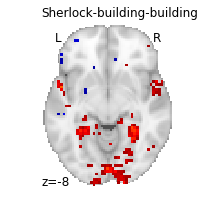

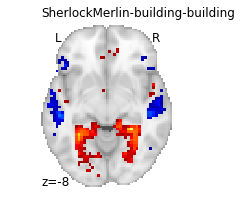

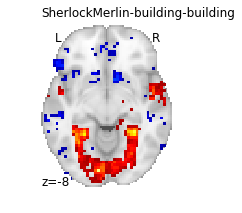

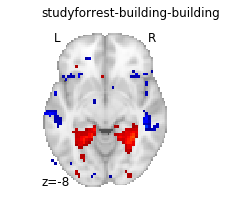

In [44]:
flat_models = flatten_collection(single_models)
for (contrast, dataset, task), an in flat_models:
    if contrast=='building':
        plot_contrast(contrast, an, space='MNI152NLin2009cAsym', plot_kwargs=dict(colorbar=False, cut_coords=[-8], vmax=15), threshold=3.29)

In [ ]:
flat_models = flatten_collection(single_models_nnd_combined)
for (contrast, _), an in flat_models:
    plot_contrast(contrast, an)